In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import heapq
import os
from decimal import Decimal
np.set_printoptions(threshold=np.nan) 
home_path = os.getcwd().replace('BC1/notebooks','')
import cPickle as pickle
import pandas as pd

import json

import copy
import matplotlib as mpl

In [2]:
with open("separate_BC.json", "r") as read_file:
    json_file = json.load(read_file)
name_json = json_file["file_name"]
split = name_json.split('.')
run_number = split[1][2:7]
single_anode_channel = int(json_file["single_anode_channel"])
number_tubes_json = len(json_file["tubes"])

#opening the file

dictionary_path = home_path+'processed_data/Dados BC1/'
file = open(dictionary_path+name_json+'_separate.pkl','rb')
results = pickle.load(file)
#Path to the channel reading mapping file
map_path = home_path+'processed_data/Dados BC1/mapping.txt'
pixel_map = np.loadtxt(map_path)

In [3]:
position=pixel_map[pixel_map!=0]
print position

[48. 46. 44. 42. 40. 38. 36. 34. 19. 32. 30. 28. 26. 23. 25. 27. 29. 31.
 33. 35. 37. 39. 41. 43. 45. 47. 24. 22. 20. 18. 16. 14. 12.  8.  6.  5.
 10. 21.  1.  2.  9. 17.  7. 11. 13. 15.]


In [4]:
cell = 'C'
data = results["Data"+cell]["data"][0][:,(position.astype(int)-1)]
single_anode = results["Data"+cell]["data"][0][:,2]

In [5]:
pos=[]
for i in range(len(data.T)):
    if (data[:,i].max()>(data[:,i].mean()+0.15*data[:,i].mean())):
        pos.append(i)
pos=np.asarray(pos)

In [6]:
pos

array([20, 21, 22, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 41, 42, 43, 44,
       45])

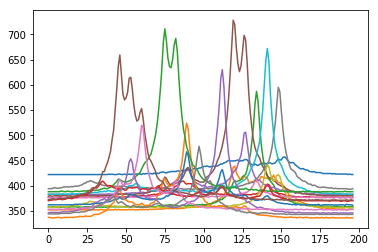

In [20]:
plt.plot(data[:,(pos-1)])
plt.show()

In [100]:
def image_plot(sources,single_anode):

    coeff=np.linalg.lstsq((sources.T),single_anode)[0]
    sums=0
    sums_normal=0
    for i in range(len(coeff)):
        sums=sums + coeff[i]*sources[i]
        sums_normal = sums_normal + sources[i]
        
    error = single_anode - sums

    
    
    plt.figure(figsize=(15,10))
    plt.plot(single_anode,label='Single-Anode PMT' )
    plt.plot(sums,label='Digital Sum with Weights')
    plt.plot(error,label = 'error')
    leg = plt.legend(bbox_to_anchor=(0.720, 0.999), loc="best", borderaxespad=0.,fontsize = 'x-large')
    leg.set_title("Plot ", prop = {'size':'x-large'})
    leg._legend_box.align = "left"
    plt.title("Digital Sum with Weights using "+ str(len(coeff)) +" Channels of MA-PMT to Single Anode PMT for Cell "+cell, fontsize = 20)
    
    plt.annotate(coeff , xy=(50, 600), xytext=(50, 600))
    
    # hide tick and tick label of the big axes
    plt.xlabel("Triggers",fontsize=15)
    plt.ylabel("ADC Counts",fontsize=15)
    plt.savefig(home_path+'BC1/analysis/'+split[1]+'/Least Squares/sum_data' +cell+'_'+str(len(coeff))+'_analysis.png', bbox_inches='tight')
   ######################################################################################################################
    fig, ax1 = plt.subplots(figsize=(15,10))

    color = 'tab:orange'
    ax1.set_xlabel('Triggers')
    ax1.set_ylabel('ADC Counts', color=color)
    ax1.plot(sums_normal, color=color,label = 'Sum')

    ax1.tick_params(axis='y', labelcolor=color)
    
    leg = plt.legend(bbox_to_anchor=(0.730, 0.999), loc="best", borderaxespad=0.,fontsize = 'x-large')
    leg.set_title("Plot ", prop = {'size':'x-large'})
    leg._legend_box.align = "left"

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('ADC Counts', color=color)  # we already handled the x-label with ax1
    ax2.plot(single_anode, color=color,label='Single-Anode PMT' )
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
   

    leg = plt.legend(bbox_to_anchor=(0.730, 0.999), loc="best", borderaxespad=0.,fontsize = 'x-large')
    leg.set_title("Plot ", prop = {'size':'x-large'})
    leg._legend_box.align = "left"

    
    plt.savefig(home_path+'BC1/analysis/'+split[1]+'/Least Squares/Wsum_data' +cell+'_'+str(len(coeff))+'_analysis.png', bbox_inches='tight')
   

    plt.close()
    plt.clf()


In [101]:
image_plot(data[:,(pos)].T,single_anode)

/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1080x720 with 0 Axes>

In [99]:
image_plot(data.T,single_anode)

/home/creison/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 1080x720 with 0 Axes>